importing all the necessary packages

In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

I imported the dimensionally reduced dataset used from the SVM notebook here

In [2]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/hk.csv'), 'data file is missing.'
hkdata = pd.read_csv(f'{data_dir}/X_hk_final4.csv')
mydata = pd.read_csv(f'{data_dir}/X_my_final4.csv')
mwdata = pd.read_csv(f'{data_dir}/X_mw_final4.csv')

In [12]:
hkdata = hkdata.drop(['Unnamed: 0'], axis=1)
hkdata

,class,y-box,high,onpix,xy2br
0,0,5,4,4,8
1,0,9,7,6,9
2,0,3,1,2,8
3,0,5,4,3,8
4,0,12,6,4,5
...,...,...,...,...,...
1468,1,9,5,4,11
1469,1,9,4,2,9
1470,1,14,8,5,7
1471,1,1,3,3,11


In [11]:
mydata = mydata.drop(['Unnamed: 0'], axis=1)
mydata

,class,x-box,y-box,width,onpix
0,0,11,15,13,7
1,0,6,9,8,9
2,0,7,11,11,9
3,0,6,9,9,6
4,0,4,5,7,4
...,...,...,...,...,...
1573,1,1,1,3,1
1574,1,5,7,5,2
1575,1,4,10,6,1
1576,1,6,9,5,2


In [10]:
mwdata = mwdata.drop(['Unnamed: 0'], axis=1)
mwdata

,class,x-box,y-box,width,onpix
0,1,12,14,12,5
1,1,5,9,6,8
2,1,3,4,4,2
3,1,4,8,5,3
4,1,2,1,3,1
...,...,...,...,...,...
1539,0,5,10,6,4
1540,0,4,3,4,3
1541,0,5,8,7,7
1542,0,6,9,10,12


The following cells shows summary statistics of the H-K, M-Y, and M-W data, along with histograms of their distributions.

(1473, 5)
             class        y-box         high        onpix        xy2br
count  1473.000000  1473.000000  1473.000000  1473.000000  1473.000000
mean      0.501697     7.083503     5.283775     4.116768     8.820774
std       0.500167     3.320793     2.192406     2.186905     1.596677
min       0.000000     0.000000     0.000000     0.000000     4.000000
25%       0.000000     5.000000     4.000000     2.000000     8.000000
50%       1.000000     7.000000     6.000000     4.000000     8.000000
75%       1.000000     9.000000     7.000000     6.000000    10.000000
max       1.000000    15.000000    10.000000    11.000000    13.000000
class
0    734
1    739
dtype: int64


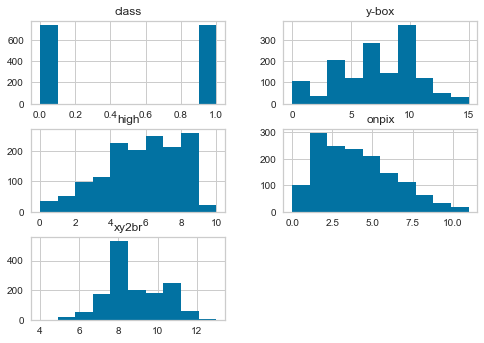

In [13]:
#Return the dimensionality of the DataFrame
print(hkdata.shape)
#Generates descriptive statistics
print(hkdata.describe())
#class distribution
print(hkdata.groupby('class').size())
#histograms
hkdata.hist()
plt.show()

(1578, 5)
             class        x-box        y-box        width        onpix
count  1578.000000  1578.000000  1578.000000  1578.000000  1578.000000
mean      0.498099     4.539924     6.830798     5.946768     4.166667
std       0.500155     2.106244     3.268945     2.240676     2.813272
min       0.000000     0.000000     0.000000     1.000000     0.000000
25%       0.000000     3.000000     5.000000     4.000000     2.000000
50%       0.000000     4.000000     7.000000     6.000000     4.000000
75%       1.000000     6.000000     9.000000     7.000000     6.000000
max       1.000000    15.000000    15.000000    15.000000    15.000000
class
0    792
1    786
dtype: int64


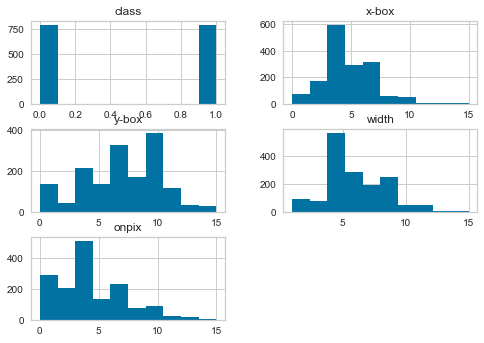

In [14]:
#Return the dimensionality of the DataFrame
print(mydata.shape)
#Generates descriptive statistics
print(mydata.describe())
#class distribution
print(mydata.groupby('class').size())
#histograms
mydata.hist()
plt.show()

(1544, 5)
             class        x-box        y-box        width        onpix
count  1544.000000  1544.000000  1544.000000  1544.000000  1544.000000
mean      0.487047     5.028497     7.053109     6.564119     5.064767
std       0.499994     2.138246     3.350515     2.288019     2.694600
min       0.000000     1.000000     0.000000     1.000000     0.000000
25%       0.000000     4.000000     5.000000     5.000000     3.000000
50%       0.000000     5.000000     8.000000     6.000000     4.000000
75%       1.000000     6.000000    10.000000     8.000000     7.000000
max       1.000000    15.000000    15.000000    15.000000    15.000000
class
0    792
1    752
dtype: int64


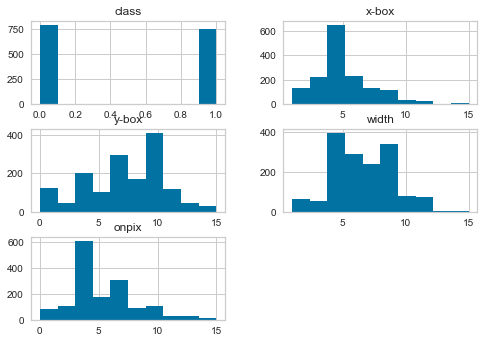

In [15]:
#Return the dimensionality of the DataFrame
print(mwdata.shape)
#Generates descriptive statistics
print(mwdata.describe())
#class distribution
print(mwdata.groupby('class').size())
#histograms
mwdata.hist()
plt.show()

The following cell separates the data into its X and Y subsets

In [16]:
hk_array = hkdata.values
X_hk = hk_array[:, 1:17]
Y_hk = hk_array[:, 0]
print('X_hk matrix dimensionality:', X_hk.shape)
print('Y_hk vector dimensionality:', Y_hk.shape)
my_array = mydata.values
X_my = my_array[:, 1:17]
Y_my = my_array[:, 0]
print('X_my matrix dimensionality:', X_my.shape)
print('Y_my vector dimensionality:', Y_my.shape)
mw_array = mwdata.values
X_mw = mw_array[:, 1:17]
Y_mw = mw_array[:, 0]
print('X_mw matrix dimensionality:', X_mw.shape)
print('Y_mw vector dimensionality:', Y_mw.shape)
Y_hk

X_hk matrix dimensionality: (1473, 4)
Y_hk vector dimensionality: (1473,)
X_my matrix dimensionality: (1578, 4)
Y_my vector dimensionality: (1578,)
X_mw matrix dimensionality: (1544, 4)
Y_mw vector dimensionality: (1544,)


array([0, 0, 0, ..., 1, 1, 1])

The following cell splits the dataset into its training and testing sets; a 10% testing set

In [17]:
X_hk_train, X_hk_test, Y_hk_train, Y_hk_test = model_selection.train_test_split(X_hk, Y_hk, test_size=0.10, random_state=10)
X_my_train, X_my_test, Y_my_train, Y_my_test = model_selection.train_test_split(X_my, Y_my, test_size=0.10, random_state=10)
X_mw_train, X_mw_test, Y_mw_train, Y_mw_test = model_selection.train_test_split(X_mw, Y_mw, test_size=0.10, random_state=10)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

The following cells use the KNeighborsClassifier and ConfusionMatrix to do an initial test of the true positive, false positive, true negative, and false negative statistics of each dataset. 

In [19]:
knn_hk = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)
knn_my = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)
knn_mw = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

cm_hk = ConfusionMatrix(knn_hk, classes="H,K".split(','))
cm_my = ConfusionMatrix(knn_my, classes="M,Y".split(','))
cm_mw = ConfusionMatrix(knn_mw, classes="M,W".split(','))

0.8108108108108109

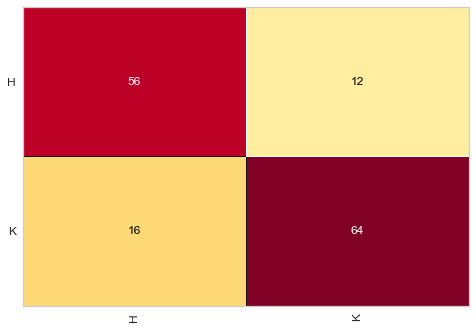

In [20]:
cm_hk.fit(X_hk_train, Y_hk_train)
cm_hk.score(X_hk_test, Y_hk_test)

0.9367088607594937

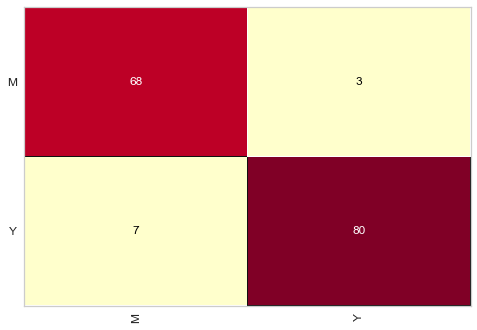

In [21]:
cm_my.fit(X_my_train, Y_my_train)
cm_my.score(X_my_test, Y_my_test)

0.7225806451612903

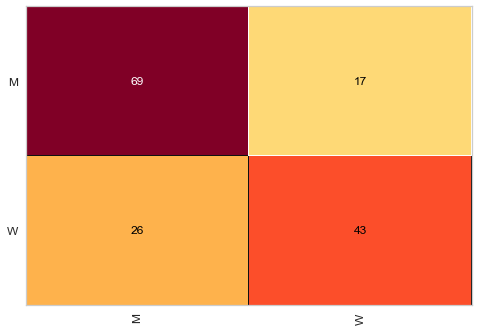

In [22]:
cm_mw.fit(X_mw_train, Y_mw_train)
cm_mw.score(X_mw_test, Y_mw_test)

The following cells predicts and shows the precision, recall, f1-score, and support of each dataset. 

In [23]:
hk_predictions = cm_hk.predict(X_hk_test)
print("Accuracy: ", accuracy_score(Y_hk_test, hk_predictions))
print(confusion_matrix(Y_hk_test, hk_predictions))
print(classification_report(Y_hk_test, hk_predictions, digits=5))
cm_hk.poof()

my_predictions = cm_my.predict(X_my_test)
print("Accuracy: ", accuracy_score(Y_my_test, my_predictions))
print(confusion_matrix(Y_my_test, my_predictions))
print(classification_report(Y_my_test, my_predictions, digits=5))
cm_my.poof()

mw_predictions = cm_mw.predict(X_mw_test)
print("Accuracy: ", accuracy_score(Y_mw_test, mw_predictions))
print(confusion_matrix(Y_mw_test, mw_predictions))
print(classification_report(Y_mw_test, mw_predictions, digits=5))
cm_mw.poof()

Accuracy:  0.8108108108108109
[[56 12]
 [16 64]]
              precision    recall  f1-score   support

           0    0.77778   0.82353   0.80000        68
           1    0.84211   0.80000   0.82051        80

    accuracy                        0.81081       148
   macro avg    0.80994   0.81176   0.81026       148
weighted avg    0.81255   0.81081   0.81109       148



<Figure size 576x396 with 0 Axes>

Accuracy:  0.9367088607594937
[[68  3]
 [ 7 80]]
              precision    recall  f1-score   support

           0    0.90667   0.95775   0.93151        71
           1    0.96386   0.91954   0.94118        87

    accuracy                        0.93671       158
   macro avg    0.93526   0.93864   0.93634       158
weighted avg    0.93816   0.93671   0.93683       158



<Figure size 576x396 with 0 Axes>

Accuracy:  0.7225806451612903
[[69 17]
 [26 43]]
              precision    recall  f1-score   support

           0    0.72632   0.80233   0.76243        86
           1    0.71667   0.62319   0.66667        69

    accuracy                        0.72258       155
   macro avg    0.72149   0.71276   0.71455       155
weighted avg    0.72202   0.72258   0.71980       155



<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
from sklearn.model_selection import GridSearchCV

The following cell is now to tune our hyperparamters to find the best distance method, number of neighbors, and weight type for each datatset

In [25]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
hk_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
my_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
mw_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fitting the model for grid search
hk_grid.fit(X_hk_train, Y_hk_train)
my_grid.fit(X_my_train, Y_my_train)
mw_grid.fit(X_mw_train, Y_mw_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [26]:
print(hk_grid.best_params_)
print(hk_grid.best_estimator_)

print(my_grid.best_params_)
print(my_grid.best_estimator_)

print(mw_grid.best_params_)
print(mw_grid.best_estimator_)

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=9)
{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=7, weights='distance')
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')


The following cell shows the precision, recall, f1-score, and support after hyperparameter tuning. 

In [27]:
hk_grid_predictions = hk_grid.predict(X_hk_test)
print("H and K: ",classification_report(Y_hk_test, hk_grid_predictions))
my_grid_predictions = my_grid.predict(X_my_test)
print("M and Y: ", classification_report(Y_my_test, my_grid_predictions))
mw_grid_predictions = mw_grid.predict(X_mw_test)
print("M and W: ", classification_report(Y_mw_test, mw_grid_predictions))

H and K:                precision    recall  f1-score   support

           0       0.77      0.81      0.79        68
           1       0.83      0.80      0.82        80

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.81      0.80      0.80       148

M and Y:                precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.95      0.92      0.94        87

    accuracy                           0.93       158
   macro avg       0.93      0.93      0.93       158
weighted avg       0.93      0.93      0.93       158

M and W:                precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.71      0.67      0.69        69

    accuracy                           0.73       155
   macro avg       0.73      0.72      0.72       155
weighted avg       0.73      0.73      0.73 

In [28]:
hk_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_hk_train, Y_hk_train)
    yhat= knn.predict(X_hk_test)
    hk_mean_acc[i-1] = metrics.accuracy_score(Y_hk_test, yhat)

hk_mean_acc

array([0.77027027, 0.81756757, 0.81756757, 0.82432432, 0.83783784,
       0.79054054, 0.81081081, 0.7972973 , 0.80405405, 0.81081081,
       0.7972973 , 0.80405405, 0.7972973 , 0.80405405, 0.81756757,
       0.81081081, 0.81081081, 0.80405405, 0.81081081, 0.82432432])

The following cells show our cross validation graphs with hyperparameter tuning for each dataset. 

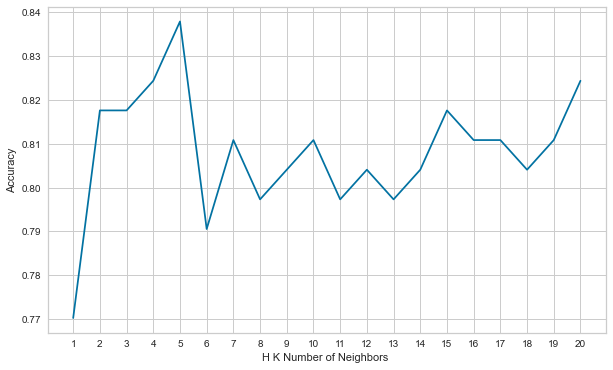

In [30]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), hk_mean_acc)
plt.xticks(loc)
plt.xlabel('H K Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [31]:
my_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_my_train, Y_my_train)
    my_yhat= knn.predict(X_my_test)
    my_mean_acc[i-1] = metrics.accuracy_score(Y_my_test, my_yhat)

my_mean_acc

array([0.94303797, 0.90506329, 0.89240506, 0.91772152, 0.92405063,
       0.92405063, 0.92405063, 0.91772152, 0.91772152, 0.91772152,
       0.91772152, 0.91772152, 0.92405063, 0.92405063, 0.92405063,
       0.91139241, 0.93037975, 0.92405063, 0.93670886, 0.93037975])

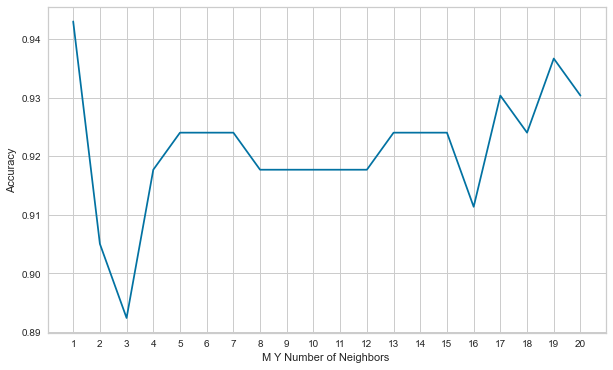

In [32]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), my_mean_acc)
plt.xticks(loc)
plt.xlabel('M Y Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [33]:
mw_mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_mw_train, Y_mw_train)
    mw_yhat= knn.predict(X_mw_test)
    mw_mean_acc[i-1] = metrics.accuracy_score(Y_mw_test, mw_yhat)

mw_mean_acc

array([0.72903226, 0.69677419, 0.72903226, 0.69677419, 0.72258065,
       0.72903226, 0.70967742, 0.70322581, 0.72903226, 0.69677419,
       0.69032258, 0.70967742, 0.70322581, 0.69032258, 0.68387097,
       0.68387097, 0.67096774, 0.69677419, 0.69677419, 0.69032258])

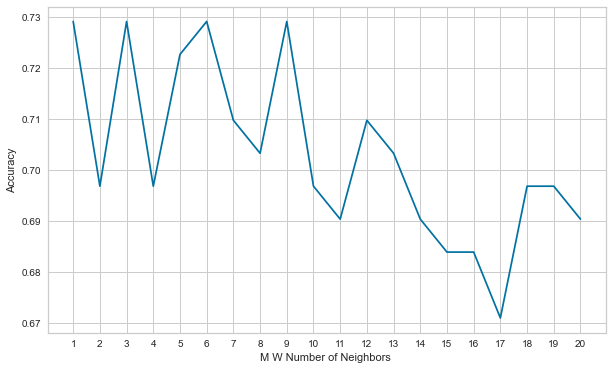

In [34]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mw_mean_acc)
plt.xticks(loc)
plt.xlabel('M W Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()